<a href="https://colab.research.google.com/github/MartinSantaGitHub/ds4b/blob/main/1.%20Human%20Resources%20Data/Esqueleto_Departamento_de_Recursos_Humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Predicción de la Retención de Empleados
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1u38Inu9eSZM02MlhLIzxY7aguGnzh17v)

![alt text](https://drive.google.com/uc?id=1UrsB2DV303p3F5-P96jZLKF_ZtLPIHg4)


![alt text](https://drive.google.com/uc?id=1DooMDDmd0ilm18AKFPfHar3SU0onyWwe)

# TAREA #2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Debe incluir el enlace completo al archivo csv que contiene su conjunto de datos
employee_df = pd.read_csv("https://raw.githubusercontent.com/MartinSantaGitHub/ds4b/main/1.%20Human%20Resources%20Data/Human_Resources_Balanced.csv")

In [4]:
employee_df = employee_df.iloc[:,1:]

In [5]:
employee_df.head(n = 5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30.000000,Travel_Rarely,317.000000,Research & Development,2.000000,3.00000,Life Sciences,1,548.000000,3.0,Female,43.000000,1.000000,2.000000,Manufacturing Director,4.000000,Single,6091.000000,24793.000000,2.000000,Y,No,20.000000,4.000000,3.000000,80,0.000000,11.000000,2.000000,3.000000,5.000000,4.000000,0.000000,2.000000,0
1,40.000000,Non-Travel,1479.000000,Sales,24.000000,3.00000,Life Sciences,1,986.000000,2.0,Female,100.000000,4.000000,4.000000,Sales Executive,2.000000,Single,13194.000000,17071.000000,4.000000,Y,Yes,16.000000,3.000000,4.000000,80,0.000000,22.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1
2,32.316298,Travel_Rarely,1173.077345,Research & Development,15.683702,1.00000,Medical,1,206.647780,2.0,Female,66.939227,1.632597,1.632597,Research Scientist,1.632597,Single,6984.247062,10987.355992,2.897790,Y,Yes,18.837017,3.683702,2.632597,80,0.000000,11.581492,4.051105,3.316298,9.051105,3.265193,6.316298,7.000000,1
3,33.846715,Travel_Rarely,690.978069,Research & Development,6.715331,1.10219,Medical,1,38.357695,2.0,Male,82.386859,2.897810,1.051095,Sales Executive,1.102190,Single,3041.701067,17494.716950,2.051095,Y,Yes,11.000000,3.000000,3.000000,80,0.051095,7.795620,2.000000,3.000000,3.897810,2.000000,1.051095,2.948905,1
4,34.000000,Travel_Rarely,182.000000,Research & Development,1.000000,4.00000,Life Sciences,1,797.000000,2.0,Female,72.000000,4.000000,1.000000,Research Scientist,4.000000,Single,3280.000000,13551.000000,2.000000,Y,No,16.000000,3.000000,3.000000,80,0.000000,10.000000,2.000000,3.000000,4.000000,2.000000,1.000000,3.000000,0


In [6]:
employee_df.tail(n = 5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
2009,28.0,Travel_Frequently,1496.0,Sales,1.0,3.0,Technical Degree,1,1486.0,1.0,Male,92.0,3.0,1.0,Sales Representative,3.0,Married,2909.0,15747.0,3.0,Y,No,15.0,3.0,4.0,80,1.0,5.0,3.0,4.0,3.0,2.0,1.0,2.0,1
2010,42.0,Travel_Frequently,458.0,Research & Development,26.0,5.0,Medical,1,1242.0,1.0,Female,60.0,3.0,3.0,Research Director,1.0,Married,13191.0,23281.0,3.0,Y,Yes,17.0,3.0,3.0,80,0.0,20.0,6.0,3.0,1.0,0.0,0.0,0.0,0
2011,51.0,Travel_Rarely,770.0,Human Resources,5.0,3.0,Life Sciences,1,1352.0,3.0,Male,84.0,3.0,4.0,Manager,2.0,Divorced,14026.0,17588.0,1.0,Y,Yes,11.0,3.0,2.0,80,1.0,33.0,2.0,3.0,33.0,9.0,0.0,10.0,0
2012,51.0,Travel_Rarely,1469.0,Research & Development,8.0,4.0,Life Sciences,1,296.0,2.0,Male,81.0,2.0,3.0,Research Director,2.0,Married,12490.0,15736.0,5.0,Y,No,16.0,3.0,4.0,80,2.0,16.0,5.0,1.0,10.0,9.0,4.0,7.0,0
2013,43.0,Travel_Rarely,1001.0,Research & Development,7.0,3.0,Life Sciences,1,451.0,3.0,Female,43.0,3.0,3.0,Healthcare Representative,1.0,Married,9985.0,9262.0,8.0,Y,No,16.0,3.0,1.0,80,1.0,10.0,1.0,2.0,1.0,0.0,0.0,0.0,0


In [7]:
# 35 características en total, cada una con 1470 puntos de datos

In [8]:
employee_df.shape

(2014, 35)

In [9]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2014 non-null   float64
 1   BusinessTravel            2014 non-null   object 
 2   DailyRate                 2014 non-null   float64
 3   Department                2014 non-null   object 
 4   DistanceFromHome          2014 non-null   float64
 5   Education                 2014 non-null   float64
 6   EducationField            2014 non-null   object 
 7   EmployeeCount             2014 non-null   int64  
 8   EmployeeNumber            2014 non-null   float64
 9   EnvironmentSatisfaction   2014 non-null   float64
 10  Gender                    2014 non-null   object 
 11  HourlyRate                2014 non-null   float64
 12  JobInvolvement            2014 non-null   float64
 13  JobLevel                  2014 non-null   float64
 14  JobRole 

In [10]:
employee_df.dtypes.value_counts()

float64    24
object      8
int64       3
dtype: int64

In [11]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.0,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.0,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
mean,35.824234,818.761930,9.815397,2.772210,1.0,833.591373,2.686559,67.971784,2.582192,1.802704,2.502528,5550.554471,13245.883277,3.032718,15.676526,3.213197,2.610587,80.0,0.626548,10.144587,2.892928,2.774350,6.172839,3.583500,2.027438,3.640370,0.470705
std,8.310983,387.654694,7.651139,1.030213,0.0,601.925326,1.009155,18.640393,0.700816,0.997345,1.074940,4101.574492,6743.688280,2.452276,3.683286,0.376461,0.975252,0.0,0.800452,6.749747,1.208114,0.638795,5.417662,3.296848,2.887006,3.131923,0.499265
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2097.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,515.250000,3.000000,2.000000,1.0,292.141327,2.000000,52.000000,2.000000,1.000000,1.581426,2759.250000,7441.818781,1.000000,13.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.348026,2.381283,1.519769,0.000000,1.308137,0.000000
50%,34.386867,823.007451,8.000000,3.000000,1.0,747.000000,3.000000,69.569501,2.975192,1.526800,2.686825,4132.803686,12878.812832,2.219509,14.789616,3.000000,2.834640,80.0,0.047752,8.921842,3.000000,3.000000,5.000000,2.005557,1.000000,2.792506,0.000000
75%,40.000000,1143.509141,15.000000,3.755922,1.0,1318.750000,3.624211,83.000000,3.000000,2.000000,3.000000,6563.500000,18575.903646,4.715567,18.348883,3.273221,3.005533,80.0,1.000000,12.000000,3.511719,3.000000,8.664420,6.000000,2.935255,6.588809,1.000000
max,60.000000,1498.000000,29.000000,5.000000,1.0,2064.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


# TAREA #3: VISUALIZACIÓN DEL DATASET

In [12]:
# Reemplazamos las columnas 'Attritition', 'Over18' y 'OverTime' por enteros antes de poder llevar a cabo cualquier visualización
#employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
employee_df['Attrition'].head(4)

0    0
1    1
2    1
3    1
Name: Attrition, dtype: int64

In [14]:
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
employee_df['Over18'].head(n = 4)

0    1
1    1
2    1
3    1
Name: Over18, dtype: int64

In [15]:
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'].head(n = 4)

0    0
1    1
2    1
3    1
Name: OverTime, dtype: int64

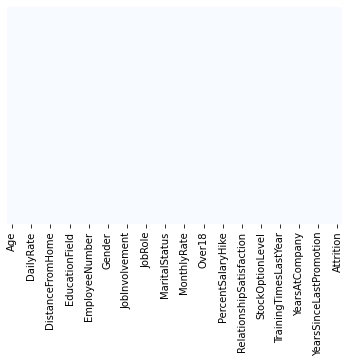

In [16]:
# Veamos si nos faltan datos, ¡afortunadamente no es así!
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

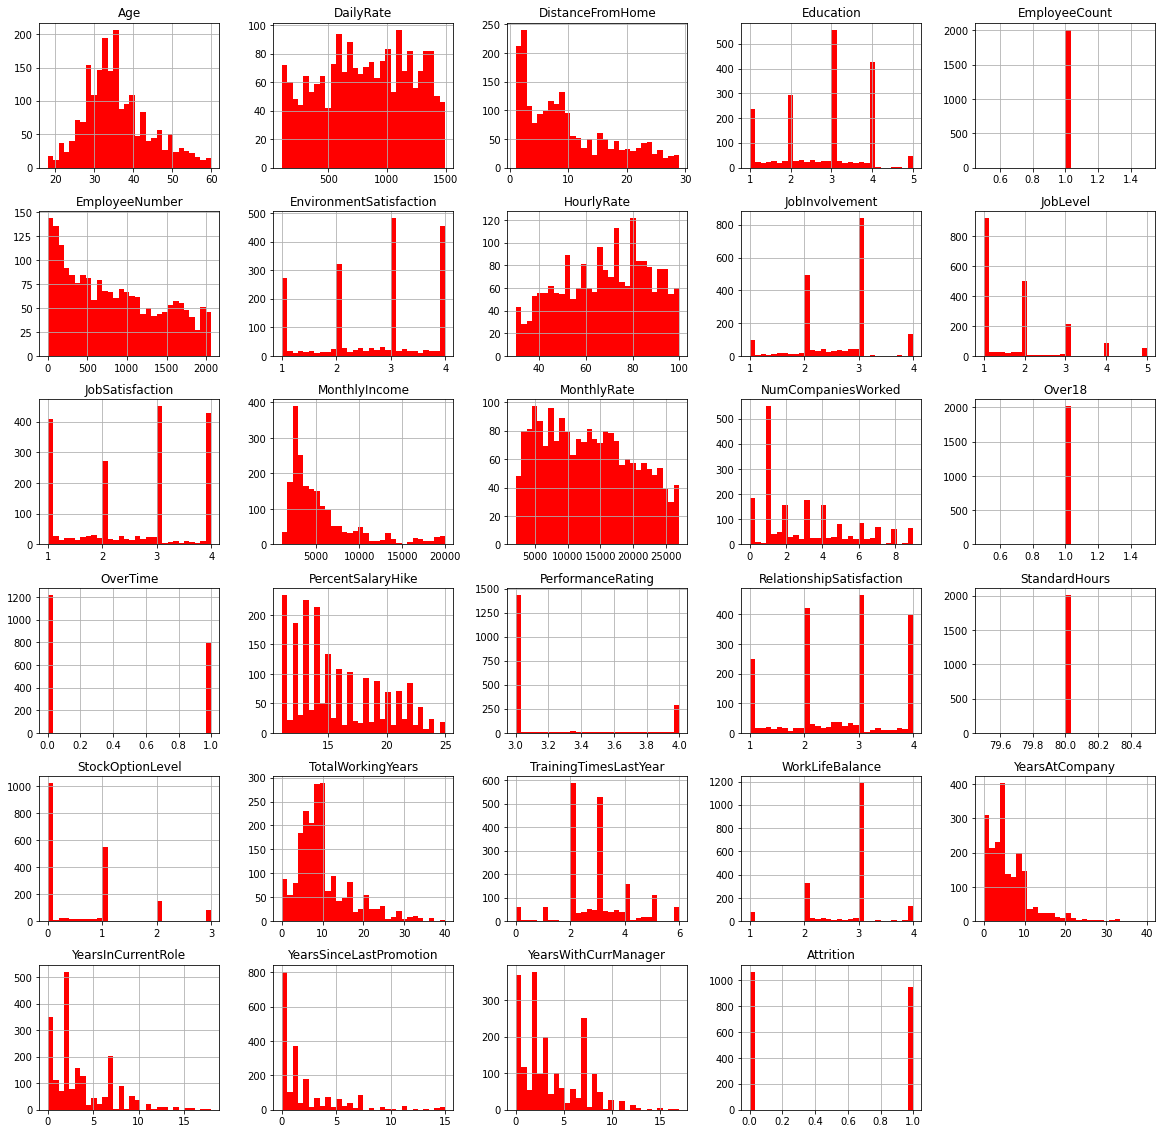

In [17]:
employee_df.hist(bins=30, figsize = (20,20), color = 'r')
plt.show()
# Algunas características como 'MonthlyIncome' y 'TotalWorkingYears' tienen una distribución con una cola muy larga (long tail distribution)
# Tiene sentido que nos desagamos de 'EmployeeCount' y 'Standardhours' ya que estos campos no cambian de un empleado a otro

In [18]:
# Tiene sentido deshacerse de 'EmployeeCount' , 'Standardhours' y 'Over18' ya que son campos que no cambian de un empleado a otro
# Eliminemos 'EmployeeNumber' también
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], inplace = True, axis = 1)

In [19]:
employee_df.shape

(2014, 31)

In [20]:
# Veamos cuantos empleados dejan la empresa!
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [21]:
# Contamos el número de empleados que se quedaron y que se fueron
# Parece que estamos ante un conjunto de datos desequilibrado
total = len(employee_df)
print(stayed_df.shape[0])
print(left_df.shape[0])
print(f"% stayed: {(stayed_df.shape[0]/total):.2f}\n% left: {(left_df.shape[0]/total):.2f}")

1066
948
% stayed: 0.53
% left: 0.47


In [22]:
left_df.describe()

# Comparemos la media y el error estándar de los empleados que se quedaron y se fueron
# 'age': la edad media de los empleados que se quedaron es mayor en comparación con los que se fueron
# 'DailyRate': El rate diario de los empleados que se quedaron es mayor
# 'DistanceFromHome': Los empleados que se quedan viven más cerca del trabajo
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Los empleados que se quedan están en general más satisfechos con sus trabajos
# 'StockOptionLevel': Los empleados que se quedan tienen un mayor nivel de stocks options

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.0
mean,33.579121,818.418278,10.675327,2.582523,2.596761,69.729086,2.349720,1.394142,2.207902,4052.478591,12375.893376,3.381745,0.566456,15.822282,3.247234,2.455403,0.335303,8.227002,2.966621,2.780106,4.953691,2.528659,1.774535,2.995469,1.0
std,7.208624,361.303713,7.048120,0.965482,0.916094,16.388206,0.646954,0.682984,0.951097,2611.998447,6114.491592,2.271325,0.495826,3.603258,0.361687,0.847907,0.641584,5.203816,1.084636,0.586844,4.550552,2.351124,2.507493,2.501800,0.0
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,29.000000,560.958938,5.018674,1.909252,2.000000,57.000000,2.000000,1.000000,1.219530,2439.512627,7436.975058,1.240891,0.000000,13.000000,3.000000,2.000000,0.000000,5.445680,2.071552,2.470727,2.000000,1.000000,0.000000,1.000000,1.0
50%,32.831208,813.000000,9.000000,2.751799,2.710894,71.622124,2.303985,1.000000,2.102802,3141.474641,12014.524414,3.000000,1.000000,14.920826,3.000000,2.433461,0.000000,7.558099,3.000000,3.000000,4.000000,2.000000,0.888528,2.578582,1.0
75%,36.810317,1116.006230,15.599412,3.164676,3.214363,82.795579,2.993598,1.670421,3.000000,4615.950577,16893.672222,5.120099,1.000000,18.774001,3.472518,3.000000,0.448328,10.000000,3.704197,3.000000,6.503720,3.000000,2.411724,4.468512,1.0
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000,1.0


In [23]:
stayed_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0
mean,37.820826,819.067542,9.050657,2.940901,2.766417,66.409006,2.788931,2.166041,2.764540,6882.802064,14019.570356,2.722326,0.240150,15.546904,3.182927,2.748593,0.885553,11.849906,2.827392,2.769231,7.257036,4.521576,2.252345,4.213884,0.0
std,8.710513,409.836758,8.076702,1.056736,1.079401,20.316179,0.682105,1.088398,1.110724,4685.811741,7172.243658,2.564073,0.427375,3.749949,0.386788,1.057334,0.838083,7.473269,1.305187,0.681913,5.879188,3.709144,3.171043,3.503618,0.0
min,18.000000,105.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2097.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,31.000000,467.250000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3468.000000,7535.250000,1.000000,0.000000,13.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.0
50%,37.000000,829.500000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5345.000000,13815.000000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000,0.0
75%,44.000000,1184.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8776.750000,20161.000000,4.000000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.0
max,60.000000,1498.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26933.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,37.000000,6.000000,4.000000,36.000000,18.000000,15.000000,17.000000,0.0


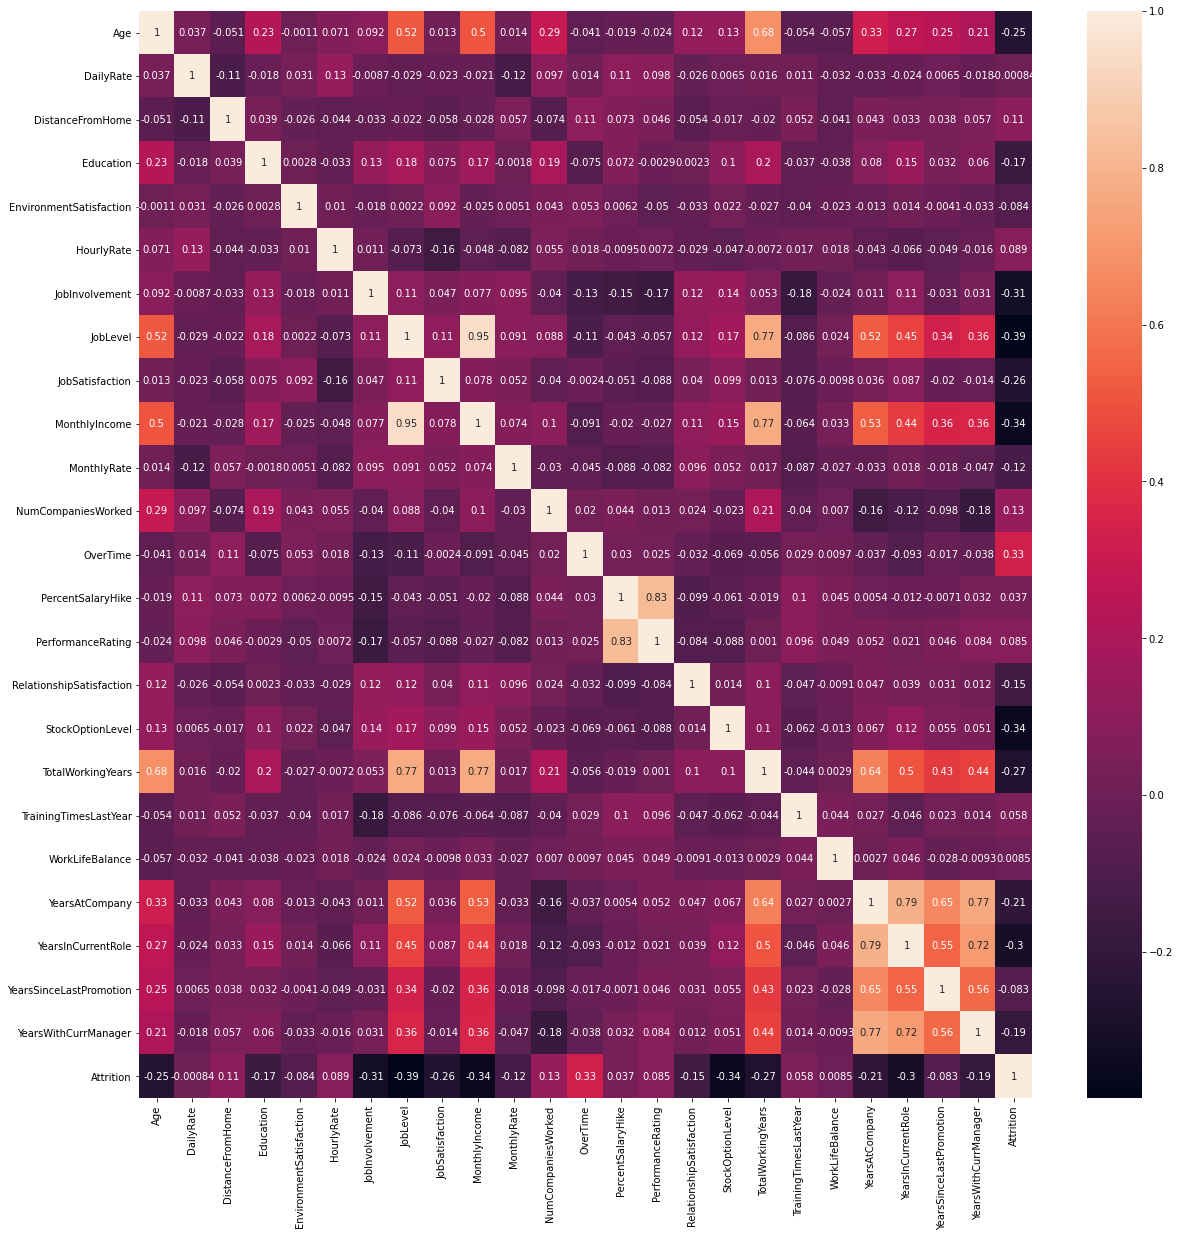

In [24]:
correlations = employee_df.corr()
f, a = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)

# Job level está altamente correlacionado con el número total de horas de trabajo
# Monthly income está altamente correlacionado con Job level
# Monthly income está altamente correlacionado con el número total de horas de trabajo
# Age está altamente correlacionado con los ingresos mensuales


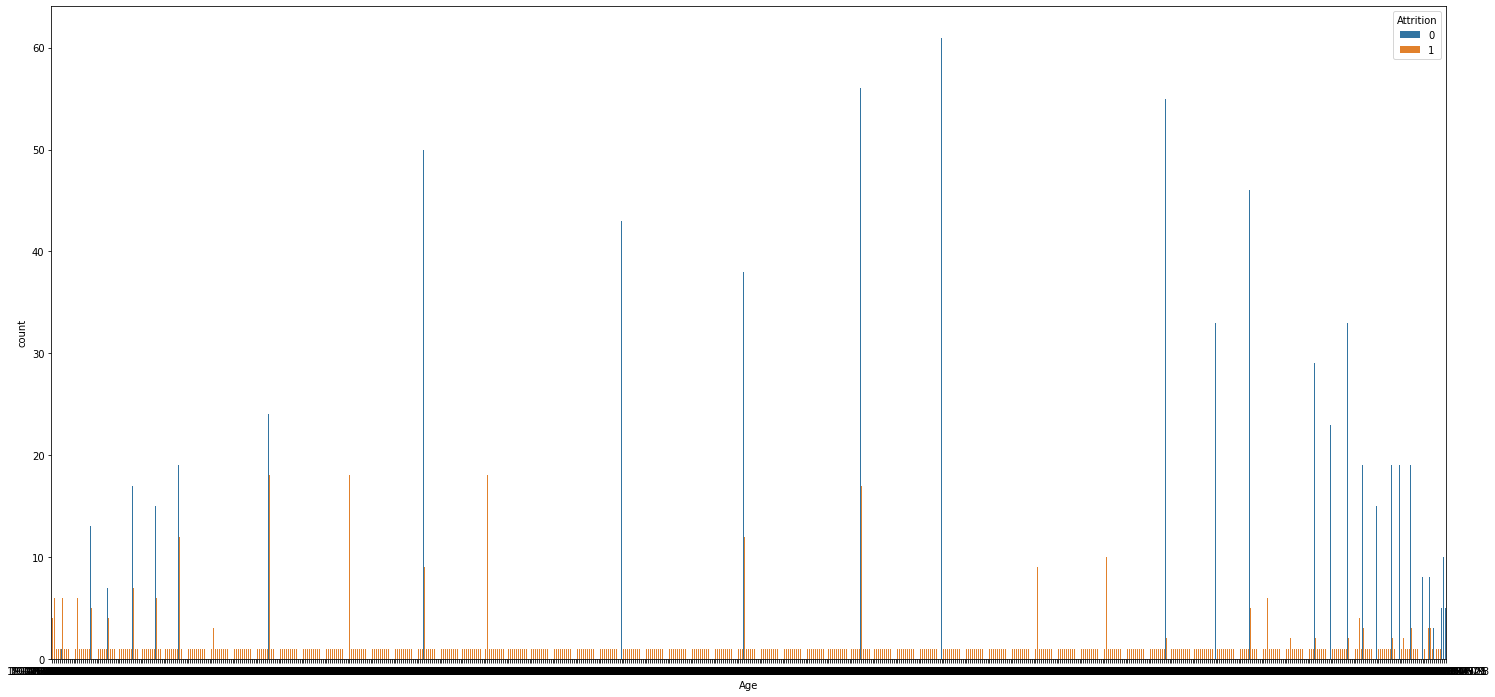

In [25]:
plt.figure(figsize = (25,12))
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)

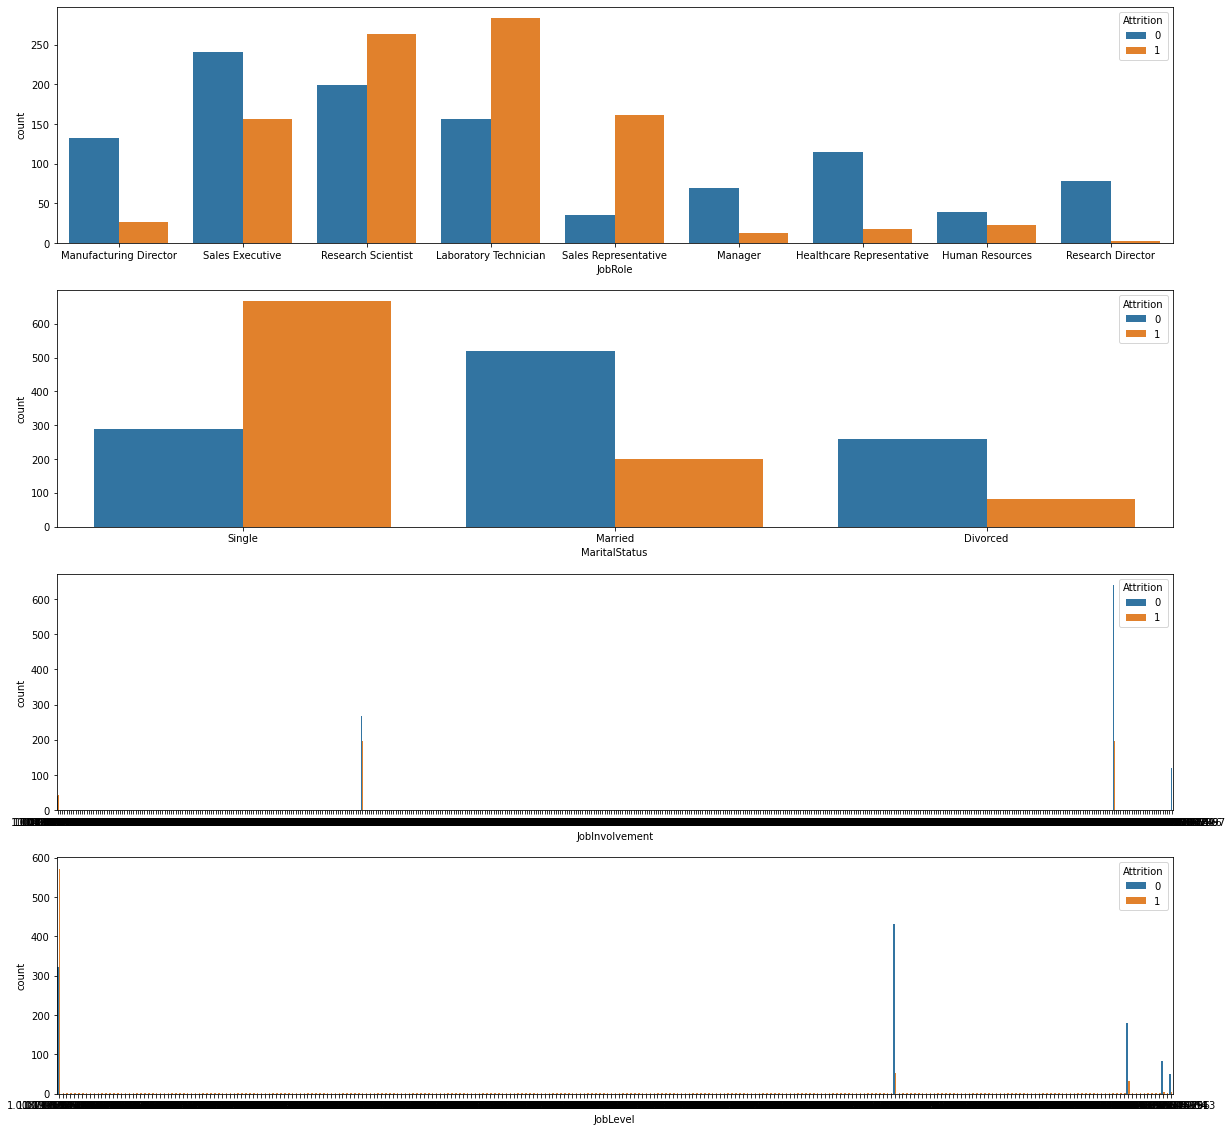

In [26]:
plt.figure(figsize = (20,20))
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)

# Los empleados solteros tienden a irse en comparación con los casados ​​y divorciados
# Los representantes de ventas tienden a irse en comparación con cualquier otro trabajo
# Los empleados menos involucrados tienden a dejar la empresa
# Los menos experimentados (nivel laboral bajo) tienden a dejar la empresa


Text(0.5, 0, 'Distance From Home To Work')

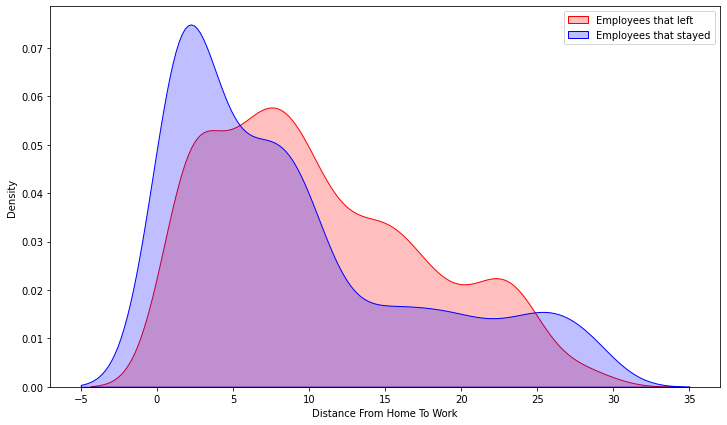

In [27]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees that left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees that stayed', shade = True, color = 'b')

plt.legend()
plt.xlabel('Distance From Home To Work')

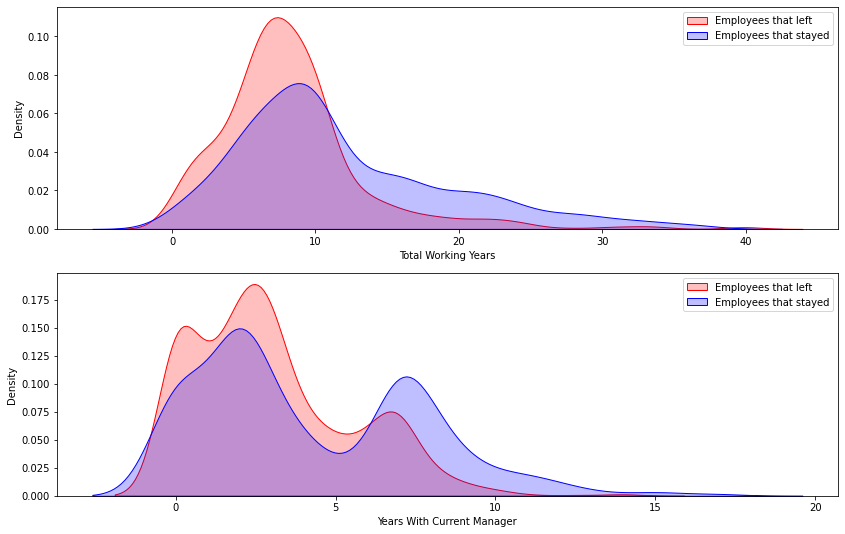

In [28]:
plt.figure(figsize = (14,9))

plt.subplot(211)
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees that left', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees that stayed', shade = True, color = 'b')
plt.xlabel('Total Working Years')
plt.legend()

plt.subplot(212)
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees that left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees that stayed', shade = True, color = 'b')
plt.xlabel('Years With Current Manager')
plt.legend()


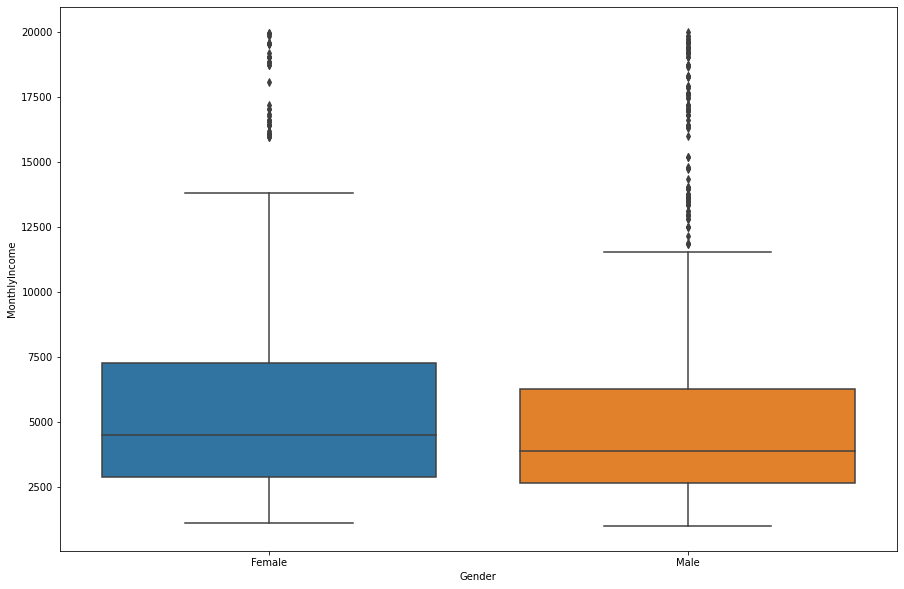

In [29]:
# Veamos el Gender vs. Monthly Income
plt.figure(figsize = (15,10))
sns.boxplot(y = 'MonthlyIncome', x = 'Gender', data = employee_df)

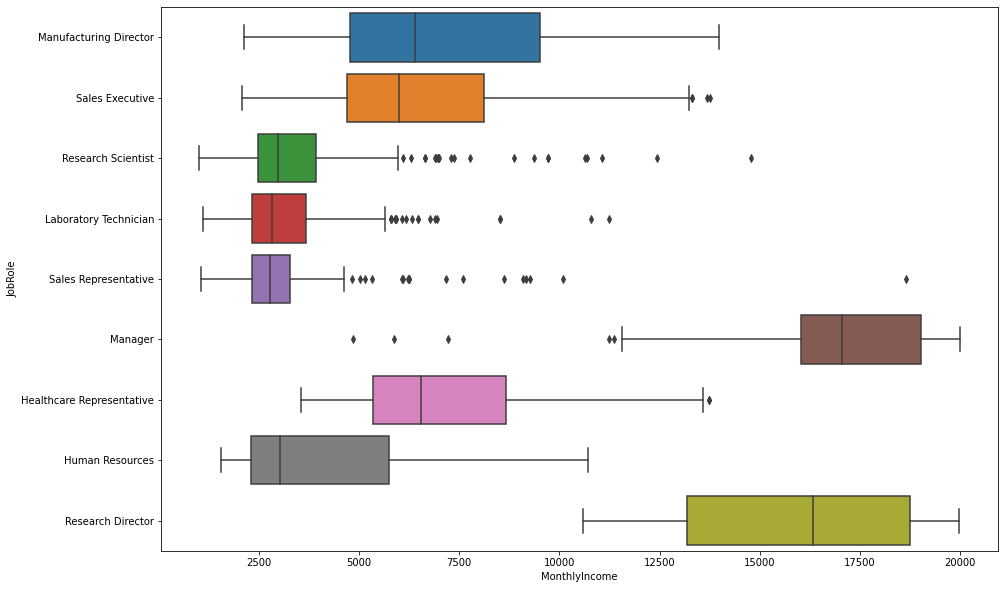

In [30]:
# Veamos el monthly income vs. job role
plt.figure(figsize = (15,10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)

# TAREA #4: CREAR LOS DATA SETS DE ENTRENAMIENTO Y TESTING Y LLEVAR A CABO LA LIMPIEZA DE DATOS

In [31]:
employee_df.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30.000000,Travel_Rarely,317.000000,Research & Development,2.000000,3.0,Life Sciences,3.0,Female,43.000000,1.000000,2.000000,Manufacturing Director,4.000000,Single,6091.000000,24793.000000,2.00000,0,20.000000,4.000000,3.000000,0.0,11.000000,2.000000,3.000000,5.000000,4.000000,0.000000,2.0,0
1,40.000000,Non-Travel,1479.000000,Sales,24.000000,3.0,Life Sciences,2.0,Female,100.000000,4.000000,4.000000,Sales Executive,2.000000,Single,13194.000000,17071.000000,4.00000,1,16.000000,3.000000,4.000000,0.0,22.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.0,1
2,32.316298,Travel_Rarely,1173.077345,Research & Development,15.683702,1.0,Medical,2.0,Female,66.939227,1.632597,1.632597,Research Scientist,1.632597,Single,6984.247062,10987.355992,2.89779,1,18.837017,3.683702,2.632597,0.0,11.581492,4.051105,3.316298,9.051105,3.265193,6.316298,7.0,1


In [32]:
categoricals = [var for var in employee_df.columns if employee_df[var].dtype == 'O']
X_cat = employee_df[categoricals]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Single
1,Non-Travel,Sales,Life Sciences,Female,Sales Executive,Single
2,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single
3,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single
4,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Single
...,...,...,...,...,...,...
2009,Travel_Frequently,Sales,Technical Degree,Male,Sales Representative,Married
2010,Travel_Frequently,Research & Development,Medical,Female,Research Director,Married
2011,Travel_Rarely,Human Resources,Life Sciences,Male,Manager,Divorced
2012,Travel_Rarely,Research & Development,Life Sciences,Male,Research Director,Married


In [33]:
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder(drop = 'first')

X_cat = oneHotEncoder.fit_transform(X_cat).toarray()

In [34]:
X_cat.shape

(2014, 20)

In [35]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2010,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2011,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# Notemos que hemos elminado la columna target, 'Attrition'
numericals = [var for var in employee_df.columns if ((employee_df[var].dtype == 'int64' or employee_df[var].dtype == 'float64') and var != 'Attrition')]
X_numerical = employee_df[numericals]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30.000000,317.000000,2.000000,3.00000,3.0,43.000000,1.000000,2.000000,4.000000,6091.000000,24793.000000,2.000000,0,20.000000,4.000000,3.000000,0.000000,11.000000,2.000000,3.000000,5.000000,4.000000,0.000000,2.000000
1,40.000000,1479.000000,24.000000,3.00000,2.0,100.000000,4.000000,4.000000,2.000000,13194.000000,17071.000000,4.000000,1,16.000000,3.000000,4.000000,0.000000,22.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
2,32.316298,1173.077345,15.683702,1.00000,2.0,66.939227,1.632597,1.632597,1.632597,6984.247062,10987.355992,2.897790,1,18.837017,3.683702,2.632597,0.000000,11.581492,4.051105,3.316298,9.051105,3.265193,6.316298,7.000000
3,33.846715,690.978069,6.715331,1.10219,2.0,82.386859,2.897810,1.051095,1.102190,3041.701067,17494.716950,2.051095,1,11.000000,3.000000,3.000000,0.051095,7.795620,2.000000,3.000000,3.897810,2.000000,1.051095,2.948905
4,34.000000,182.000000,1.000000,4.00000,2.0,72.000000,4.000000,1.000000,4.000000,3280.000000,13551.000000,2.000000,0,16.000000,3.000000,3.000000,0.000000,10.000000,2.000000,3.000000,4.000000,2.000000,1.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,28.000000,1496.000000,1.000000,3.00000,1.0,92.000000,3.000000,1.000000,3.000000,2909.000000,15747.000000,3.000000,0,15.000000,3.000000,4.000000,1.000000,5.000000,3.000000,4.000000,3.000000,2.000000,1.000000,2.000000
2010,42.000000,458.000000,26.000000,5.00000,1.0,60.000000,3.000000,3.000000,1.000000,13191.000000,23281.000000,3.000000,1,17.000000,3.000000,3.000000,0.000000,20.000000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000
2011,51.000000,770.000000,5.000000,3.00000,3.0,84.000000,3.000000,4.000000,2.000000,14026.000000,17588.000000,1.000000,1,11.000000,3.000000,2.000000,1.000000,33.000000,2.000000,3.000000,33.000000,9.000000,0.000000,10.000000
2012,51.000000,1469.000000,8.000000,4.00000,2.0,81.000000,2.000000,3.000000,2.000000,12490.000000,15736.000000,5.000000,0,16.000000,3.000000,4.000000,2.000000,16.000000,5.000000,1.000000,10.000000,9.000000,4.000000,7.000000


In [37]:
X_numerical = X_numerical.reset_index()
X_numerical.drop(['index'], axis=1, inplace=True)
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,30.000000,317.000000,2.000000,3.00000,3.0,43.000000,1.000000,2.000000,4.000000,6091.000000,24793.000000,2.000000,0,20.000000,4.000000,3.000000,0.000000,11.000000,2.000000,3.000000,5.000000,4.000000,0.000000,2.000000
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,40.000000,1479.000000,24.000000,3.00000,2.0,100.000000,4.000000,4.000000,2.000000,13194.000000,17071.000000,4.000000,1,16.000000,3.000000,4.000000,0.000000,22.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,32.316298,1173.077345,15.683702,1.00000,2.0,66.939227,1.632597,1.632597,1.632597,6984.247062,10987.355992,2.897790,1,18.837017,3.683702,2.632597,0.000000,11.581492,4.051105,3.316298,9.051105,3.265193,6.316298,7.000000
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,33.846715,690.978069,6.715331,1.10219,2.0,82.386859,2.897810,1.051095,1.102190,3041.701067,17494.716950,2.051095,1,11.000000,3.000000,3.000000,0.051095,7.795620,2.000000,3.000000,3.897810,2.000000,1.051095,2.948905
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34.000000,182.000000,1.000000,4.00000,2.0,72.000000,4.000000,1.000000,4.000000,3280.000000,13551.000000,2.000000,0,16.000000,3.000000,3.000000,0.000000,10.000000,2.000000,3.000000,4.000000,2.000000,1.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,28.000000,1496.000000,1.000000,3.00000,1.0,92.000000,3.000000,1.000000,3.000000,2909.000000,15747.000000,3.000000,0,15.000000,3.000000,4.000000,1.000000,5.000000,3.000000,4.000000,3.000000,2.000000,1.000000,2.000000
2010,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,42.000000,458.000000,26.000000,5.00000,1.0,60.000000,3.000000,3.000000,1.000000,13191.000000,23281.000000,3.000000,1,17.000000,3.000000,3.000000,0.000000,20.000000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000
2011,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.000000,770.000000,5.000000,3.00000,3.0,84.000000,3.000000,4.000000,2.000000,14026.000000,17588.000000,1.000000,1,11.000000,3.000000,2.000000,1.000000,33.000000,2.000000,3.000000,33.000000,9.000000,0.000000,10.000000
2012,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.000000,1469.000000,8.000000,4.00000,2.0,81.000000,2.000000,3.000000,2.000000,12490.000000,15736.000000,5.000000,0,16.000000,3.000000,4.000000,2.000000,16.000000,5.000000,1.000000,10.000000,9.000000,4.000000,7.000000


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X_all)

In [39]:
X

array([[0.        , 1.        , 1.        , ..., 0.22222222, 0.        ,
        0.11764706],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.18139963, 0.42108655,
        0.41176471],
       ...,
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.58823529],
       [0.        , 1.        , 1.        , ..., 0.5       , 0.26666667,
        0.41176471],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
y = employee_df['Attrition']
y

0       0
1       1
2       1
3       1
4       0
       ..
2009    1
2010    0
2011    0
2012    0
2013    0
Name: Attrition, Length: 2014, dtype: int64

# TAREA #5: ENTENDER LA TEORÍA DETRÁS DE LA REGRESIÓN LOGÍSTICA, REDES NEURONALES ARTIFICIALES Y CLASIFICADORES DE BOSQUES ALEATORIOS

![alt text](https://drive.google.com/uc?id=1zC0o6mkPWhlIwbs1J2LXTVv1IjtTgBLw)

![alt text](https://drive.google.com/uc?id=1JahiZRxjM1gd1cdSlJXBsSmR3cCrZEwr)

![alt text](https://drive.google.com/uc?id=1Vf81FJgCX518kr8FFS-sgzT6Nu7yjMQA)

![alt text](https://drive.google.com/uc?id=11_L_2NlgtZJulG5BI6Lj8MMGpO5F_QJV)

![alt text](https://drive.google.com/uc?id=1azYXfWAiUl1LkzEJXYN-GRZneTfzMsVV)

# TAREA #6: ENTENDER COMO SE EVALUAN LOS MODELOS DE CLASIFICACIÓN

![alt text](https://drive.google.com/uc?id=1Mj1ZhIqcnJl1tfIHeq6R6T8LVzbodtqa)

![alt text](https://drive.google.com/uc?id=1095MBU9oYD1eE65fTrz-8sFgYbbvwAuH)

![alt text](https://drive.google.com/uc?id=1OojsDQecO-69GQFDYsULNhqgxAP9PrU3)

![alt text](https://drive.google.com/uc?id=1G1-il6xFMUuz3nd78kvwiP3mcuXqZM3U)

# TAREA #7: ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO LA REGRESIÓN LOGÍSTICA

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [42]:
X_train.shape

(1510, 44)

In [43]:
X_test.shape

(504, 44)

In [44]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components = 18)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

#explained_variance = pca.explained_variance_ratio_

In [45]:
#np.sum(explained_variance)

In [46]:
#from imblearn.over_sampling import SMOTE

#oversampler = SMOTE(random_state=0)

#smote_train, smote_target = oversampler.fit_sample(X_train, y_train)

In [47]:
#print(len(smote_target[smote_target == 1]) / len(smote_target))
#print(len(smote_target[smote_target == 0]) / len(smote_target))

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [49]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

print(f"Accuracy {100 * accuracy_score(y_test, y_pred)}")

Accuracy 87.6984126984127


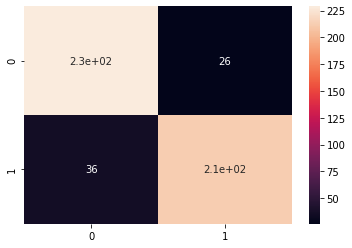

In [51]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       255
           1       0.89      0.86      0.87       249

    accuracy                           0.88       504
   macro avg       0.88      0.88      0.88       504
weighted avg       0.88      0.88      0.88       504

0.8729508196721311


# TAREA #8: ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
y_pred = model.predict(X_test)

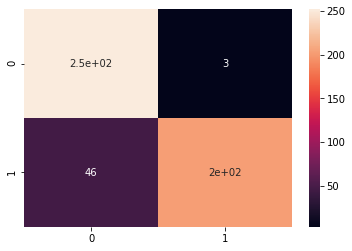

In [55]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       255
           1       0.99      0.82      0.89       249

    accuracy                           0.90       504
   macro avg       0.92      0.90      0.90       504
weighted avg       0.91      0.90      0.90       504



# TAREA #8: ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO DEEP LEARNING

In [57]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#from imblearn.under_sampling import RandomUnderSampler

In [58]:
def build_classifier():
  #initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
  
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = (44, )))    

  model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))  

  model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))  

  #opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho = 0.9)

  par = tf.keras.metrics.PrecisionAtRecall(0.6)

  model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics=['accuracy'])
  
  return model

model = build_classifier()

In [59]:
classifier_cv = KerasClassifier(build_fn = build_classifier, epochs = 150, batch_size = 32)

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2880      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


In [61]:
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(classifier_cv, X_train, y_train, scoring='recall', cv=10, n_jobs=-1)
print(f'Mean Recall: {np.mean(scores)}')

Mean Recall: 0.8565217114513789


In [62]:
epochs_hist = model.fit(X_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
48/48 [==============================] - 1s 931us/step - loss: 0.5617 - accuracy: 0.7444
Epoch 2/150
48/48 [==============================] - 0s 938us/step - loss: 0.4160 - accuracy: 0.8199
Epoch 3/150
48/48 [==============================] - 0s 939us/step - loss: 0.3698 - accuracy: 0.8523
Epoch 4/150
48/48 [==============================] - 0s 967us/step - loss: 0.3446 - accuracy: 0.8523
Epoch 5/150
48/48 [==============================] - 0s 922us/step - loss: 0.3317 - accuracy: 0.8642
Epoch 6/150
48/48 [==============================] - 0s 976us/step - loss: 0.3157 - accuracy: 0.8728
Epoch 7/150
48/48 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.8907
Epoch 8/150
48/48 [==============================] - 0s 951us/step - loss: 0.2960 - accuracy: 0.8781
Epoch 9/150
48/48 [==============================] - 0s 1ms/step - loss: 0.2871 - accuracy: 0.8808
Epoch 10/150
48/48 [==============================] - 0s 1ms/step - loss: 0.2825 - accuracy: 0.

In [63]:
y_pred = (model.predict(X_test) > 0.5)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       255
           1       0.93      0.85      0.89       249

    accuracy                           0.89       504
   macro avg       0.90      0.89      0.89       504
weighted avg       0.90      0.89      0.89       504

0.887029288702929


In [64]:
y_pred = model.predict(X_test)
#y_pred

In [65]:
y_pred = (y_pred > 0.5)
#y_pred

In [66]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

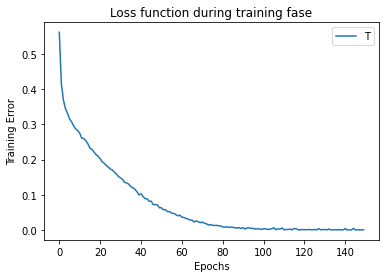

In [67]:
plt.plot(epochs_hist.history['loss'])
plt.title("Loss function during training fase")
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.legend('Training Error')

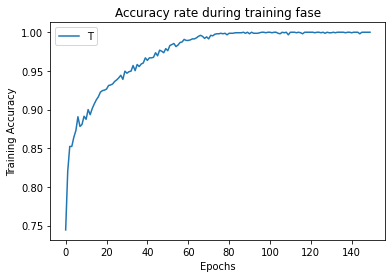

In [68]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Accuracy rate during training fase")
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend('Training Accuracy')

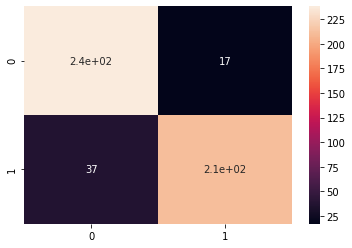

In [69]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       255
           1       0.93      0.85      0.89       249

    accuracy                           0.89       504
   macro avg       0.90      0.89      0.89       504
weighted avg       0.90      0.89      0.89       504



# ¡EXCELENTE TRABAJO! USTED DEBE ESTAR ORGULLOSO DE SUS HABILIDADES RECIEN ADQUIRIDAS